In [2]:
import tables
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use(hep.style.CMS)

In [13]:
plt_channels = [f'PLT{i}' for i in range(16)]
nBCIDs = 3564

results = pd.read_csv('SS_results.csv')
results = results[~results['Detector'].isin(plt_channels)]

In [14]:
collidingBCID = [102, 123, 144, 165, 186, 207, 228, 249, 281, 302, 323, 344, 365, 386, 407, 428, 463, 484, 505, 526, 547, 568, 589, 610, 642, 663, 684, 705, 726, 747, 768, 789, 821, 842, 863, 884, 905, 926, 947, 968, 1017, 1038, 1059, 1080, 1101, 1122, 1143, 1164, 1196, 1217, 1238, 1259, 1280, 1301, 1322, 1343, 1375, 1396, 1417, 1438, 1459, 1480, 1501, 1522, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1733, 1754, 1775, 1796, 1817, 1838, 1859, 1880, 1915, 1936, 1957, 1978, 1999, 2020, 2041, 2062, 2094, 2115, 2136, 2157, 2178, 2199, 2220, 2241, 2273, 2294, 2315, 2336, 2357, 2378, 2399, 2420, 2452, 2473, 2494, 2515, 2536, 2557, 2578, 2599, 2631, 2652, 2673, 2694, 2715, 2736, 2757, 2778, 2817, 2838, 2859, 2880, 2901, 2922, 2943, 2964, 2996, 3017, 3038, 3059, 3080, 3101, 3122, 3143]
nonCollidingBCID = [3, 45, 21, 63]
emptyBCID = [i for i in range(nBCIDs) if i not in collidingBCID and i not in nonCollidingBCID]

In [15]:
results = results[results['BCID'].isin([i for i in collidingBCID])]
BCID_flag = 'Colliding Bunches'

In [17]:
results['BCID'] = results['BCID'].astype(str)

In [20]:
def std_avg(x: pd.DataFrame):
    d = {}
    d['scan_AvgRate'] = x['AvgRate'].mean()
    d['scan_Std'] = x['AvgRate'].std()
    d['scan_Sem'] = x['AvgRate'].sem()
    return pd.Series(d, index=d.keys())

In [21]:
bgfbun = results.groupby(['Detector', 'BCID']).apply(std_avg).reset_index()

In [22]:
bgfbun

Detector  BCID  scan_AvgRate      scan_Std      scan_Sem
0      BCM1F  1017      0.000002  7.935584e-08  3.548901e-08
1      BCM1F   102      0.000002  2.062751e-07  9.224903e-08
2      BCM1F  1038      0.000002  1.387441e-07  6.204823e-08
3      BCM1F  1059      0.000002  1.777866e-07  7.950860e-08
4      BCM1F  1080      0.000002  1.897322e-07  8.485084e-08
..       ...   ...           ...           ...           ...
675      PLT   884      0.000002  1.533376e-07  6.857467e-08
676      PLT   905      0.000002  1.447854e-07  6.475001e-08
677      PLT   926      0.000002  3.539628e-07  1.582970e-07
678      PLT   947      0.000002  2.024986e-07  9.056014e-08
679      PLT   968      0.000002  1.416633e-07  6.335374e-08

[680 rows x 5 columns]

In [29]:
# make 5 dataframe for each detector
plt0 = bgfbun[bgfbun['Detector'] == 'PLT'].set_index('BCID')
bcm1 = bgfbun[bgfbun['Detector'] == 'BCM1F'].set_index('BCID')
bcm2 = bgfbun[bgfbun['Detector'] == 'BCM1FUTCA'].set_index('BCID')
hf = bgfbun[bgfbun['Detector'] == 'HFOC'].set_index('BCID')

In [32]:
# bcm1 and bcm2 ratio
test = bcm1['scan_AvgRate'] / bcm2['scan_AvgRate']

In [42]:
# sort index
# type casting to int
test = test.reset_index().sort_values('BCID', key=lambda x: x.astype(int))

In [43]:
test

BCID  scan_AvgRate
1     102      1.225084
11    123      1.209006
22    144      1.186905
32    165      1.282047
43    186      1.103590
..    ...           ...
101  3059      1.225519
102  3080      1.149512
103  3101      1.166004
104  3122      1.193438
105  3143      1.147976

[136 rows x 2 columns]

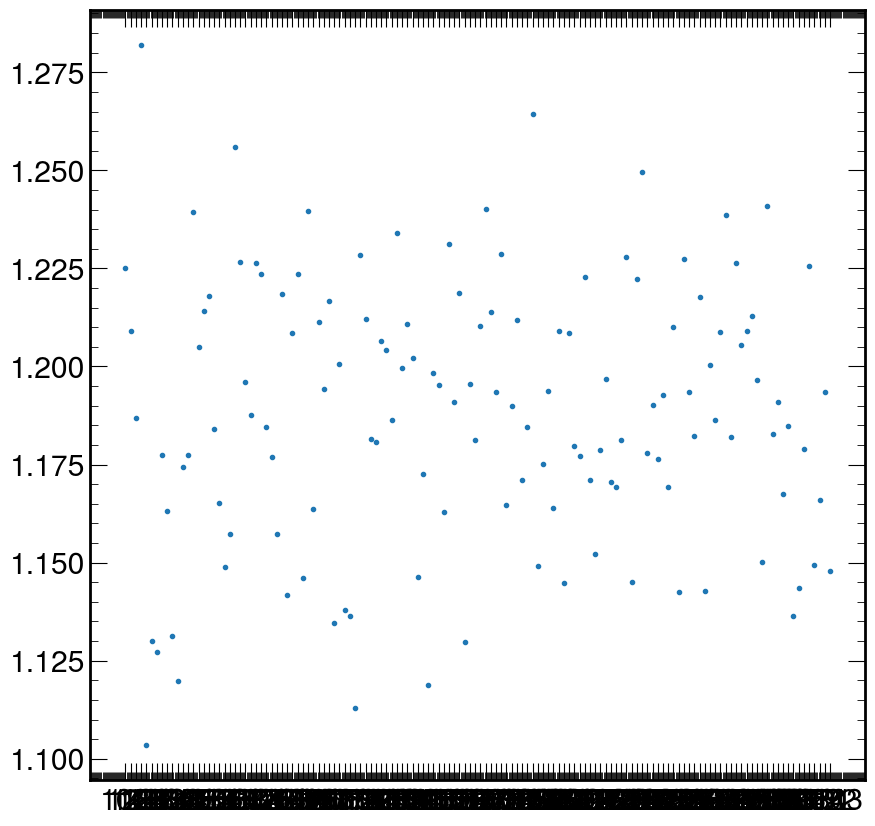

In [45]:
plt.plot(test['BCID'], test['scan_AvgRate'], '.', label='BCM1F / BCM1FUTCA')

In [54]:
# select PLT and scan ss1
a = results[(results['Detector'] == 'PLT') & (results['Scan'] == 'ss1')].set_index('BCID')
b = results[(results['Detector'] == 'PLT') & (results['Scan'] == 'ss2')].set_index('BCID')


In [56]:
c = a['AvgRate'] / b['AvgRate']

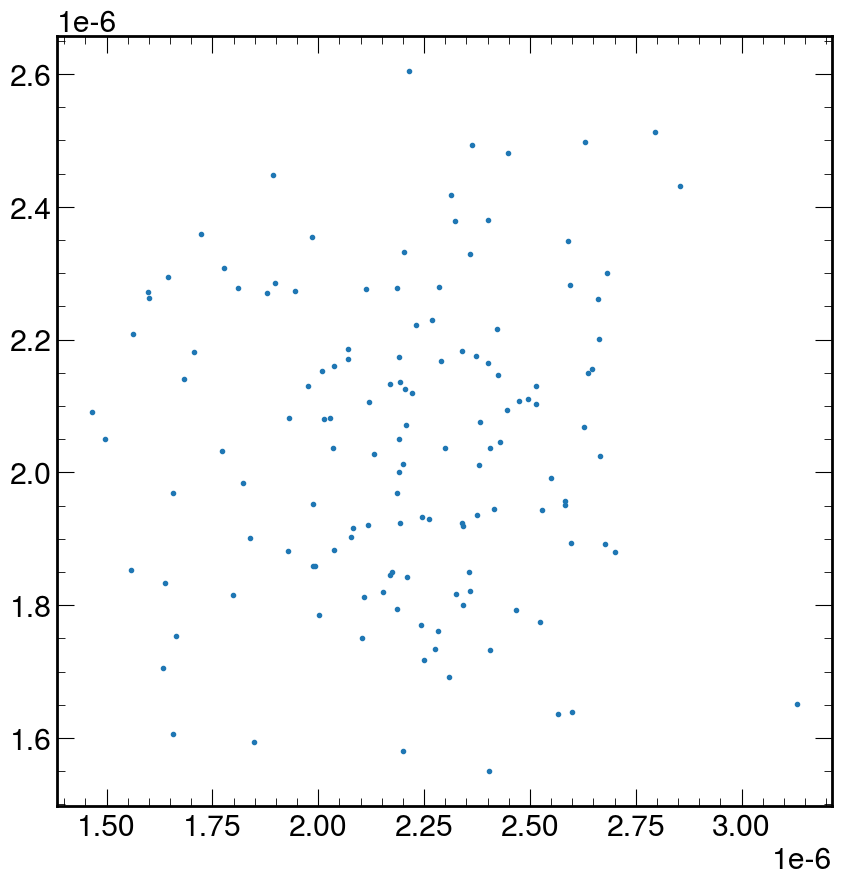

In [60]:
plt.plot(a['AvgRate'], b['AvgRate'], '.')